In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
def build_model():
    # Inputs are: User Index, Time of Day, Time of Year, Zonal Average
    inp_data = tf.keras.layers.Input(shape=(4,))
    prc_data = tf.keras.layers.Dense(5, activation='relu')(inp_data)
    out_data = tf.keras.layers.Dense(1, activation='relu')(prc_data)
    model = tf.keras.models.Model(inputs=inp_data, outputs=out_data)
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
    
model = build_model()

In [66]:
pseudo_data = pd.DataFrame(columns=['user', 'zone', 'time', 'year', 'consumption'])
n_users = 100

zone_means = np.array([ n_users + np.random.randint(-250, 250) for i in range(10) ]) # Data per day
time_means = np.array([ 20, 20, 10, 50, 100, 200, 300, 250, 100, 90, 80, 70, 50, 80, 50, 70, 100, 100, 90, 120, 100, 80, 50, 40 ]) # Temporal Rates
time_means = np.divide(time_means, sum(time_means))
year_means = np.array([ -150, -100, -50, 30, 200, 200, 100, 60, 0, 0, -40, -100 ])
user_means = np.random.normal(0, 100, n_users)

pseudo_np = np.zeros((n_users * 12 * 24, 5), dtype=int)

record = 0
for user_val in range(n_users):
    for year_val in range(12):
        for time_val in range(24):
            zone_val = np.random.randint(1, 10)
            mean = max(1000 + zone_means[zone_val] + year_means[year_val] + user_means[user_val], 0)
            consumption = int(max(mean * time_means[time_val] + np.random.normal(0, 10), 0))
            pseudo_np[record] = [user_val, zone_val, time_val, year_val, consumption]
            record += 1

pseudo_data = pd.DataFrame(pseudo_np, columns=['user', 'zone', 'time', 'year', 'consumption'])
pseudo_data.head(30)

,user,zone,time,year,consumption
0,0,4,0,0,0
1,0,6,1,0,0
2,0,5,2,0,4
3,0,2,3,0,22
4,0,2,4,0,37
5,0,3,5,0,65
6,0,9,6,0,170
7,0,4,7,0,114
8,0,2,8,0,58
9,0,1,9,0,22


In [69]:
out_feed = pseudo_data['consumption']
in_feed = pseudo_data.drop('consumption', axis=1)

print(in_feed.shape)
history = model.fit(x=in_feed, y=out_feed, epochs=100)

(28800, 4)
Epoch 1/100
28800/28800 [==============================] - 2s 61us/sample - loss: 560.3580
Epoch 2/100
28800/28800 [==============================] - 2s 59us/sample - loss: 553.2419
Epoch 3/100
28800/28800 [==============================] - 2s 60us/sample - loss: 545.4476
Epoch 4/100
28800/28800 [==============================] - 2s 59us/sample - loss: 538.8450
Epoch 5/100
28800/28800 [==============================] - 2s 59us/sample - loss: 530.9851
Epoch 6/100
28800/28800 [==============================] - 2s 59us/sample - loss: 523.8875
Epoch 7/100
28800/28800 [==============================] - 2s 58us/sample - loss: 516.6194
Epoch 8/100
28800/28800 [==============================] - 2s 59us/sample - loss: 509.3378
Epoch 9/100
28800/28800 [==============================] - 2s 59us/sample - loss: 501.7305
Epoch 10/100
28800/28800 [==============================] - 2s 59us/sample - loss: 494.1860
Epoch 11/100
28800/28800 [==============================] - 2s 62us/sample - l

28800/28800 [==============================] - 2s 60us/sample - loss: 305.0063
Epoch 91/100
28800/28800 [==============================] - 2s 59us/sample - loss: 304.5307
Epoch 92/100
28800/28800 [==============================] - 2s 60us/sample - loss: 304.3367
Epoch 93/100
28800/28800 [==============================] - 2s 59us/sample - loss: 304.5933
Epoch 94/100
28800/28800 [==============================] - 2s 59us/sample - loss: 303.7916
Epoch 95/100
28800/28800 [==============================] - 2s 59us/sample - loss: 303.3579
Epoch 96/100
28800/28800 [==============================] - 2s 60us/sample - loss: 304.7230
Epoch 97/100
28800/28800 [==============================] - 2s 58us/sample - loss: 302.8920
Epoch 98/100
28800/28800 [==============================] - 2s 59us/sample - loss: 303.4398
Epoch 99/100
28800/28800 [==============================] - 2s 60us/sample - loss: 302.1504
Epoch 100/100
28800/28800 [==============================] - 2s 58us/sample - loss: 302.3842


In [70]:
pseudo_data['predicted_consumption'] = model.predict(in_feed)

Text(0, 0.5, 'Loss')

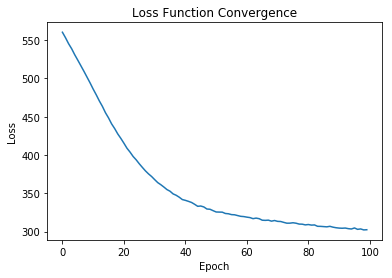

In [74]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.title('Loss Function Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [71]:
pseudo_data.head()

,user,zone,time,year,consumption,predicted_consumption
0,0,4,0,0,0,0.000000
1,0,6,1,0,0,0.000000
2,0,5,2,0,4,0.000000
3,0,2,3,0,22,8.147394
4,0,2,4,0,37,52.159256
